In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
%matplotlib inline

В данном датасете я хочу провести анализ и выявить влияние ранга университетов на трудоустройство выпускников

In [233]:
data = pd.read_excel('World_University_Ranking.xlsx')
data.head()

world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  citations  broad_impact  patents   score  year  
0             1          1          1           NaN        5  100.00  2012  
1            12          4          4           NaN        1   91.67  2012  
2             4          2          2           NaN       15   89.50  2012  
3            16         16         11           NaN       50   86.17  2012  
4            37         22         22           NaN       18   85.21  2012

In [234]:
data.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

`world_rank`: Мировой рейтинг университета.
`institution`: Название университета.
`country`: Страна.
`national_rank`: Национальный рейтинг.
`quality_of_education`: Качество образования.
`alumni_employment`: Трудоустройство выпускников.
`quality_of_faculty`: Качество преподавательского состава.
`publications`: Публикации.
`influence`: Влияние.
`citations`: Цитирования.
`broad_impact`: Широкое воздействие.
`patents`: Патенты.
`score`: Итоговый балл.
`year`: Год.

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [236]:
data.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [237]:
corr = data['broad_impact'].corr(data['alumni_employment'], method='pearson')
print("Коэффициент корреляции Пирсона между broad_impact и alumni_employment:", corr)

Коэффициент корреляции Пирсона между broad_impact и alumni_employment: 0.4236192758149753


In [238]:
data['broad_impact'][data.year<2014].isnull().sum()

200

Так как `broad_impact` до 2014 года абсолютно пуст, то я разделю датасет на две части: в первой части, до 2014 года, `broad_impact` не будет рассматриваться. Далее рассмотрим данные от 2012 до 2013 гг

In [239]:
df1 = data[data.year<2014].copy()

In [240]:
df1.head()

world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  citations  broad_impact  patents   score  year  
0             1          1          1           NaN        5  100.00  2012  
1            12          4          4           NaN        1   91.67  2012  
2             4          2          2           NaN       15   89.50  2012  
3            16         16         11           NaN       50   86.17  2012  
4            37         22         22           NaN       18   85.21  2012

In [241]:
df1.tail()

world_rank                         institution    country  national_rank  \
195          96      Australian National University  Australia              2   
196          97               University of Alberta     Canada              4   
197          98              University of Helsinki    Finland              1   
198          99  Paris Diderot University - Paris 7     France              5   
199         100     Georgia Institute of Technology        USA             57   

     quality_of_education  alumni_employment  quality_of_faculty  \
195                   101                101                  43   
196                   101                101                 101   
197                    69                101                  81   
198                    28                101                  72   
199                   101                 85                 101   

     publications  influence  citations  broad_impact  patents  score  year  
195           101        101        101           NaN      101  44.50  2013  
196            68        101         92           NaN       81  44.50  2013  
197            74         79         71           NaN      101  44.39  2013  
198           101         87        101           NaN      101  44.36  2013  
199            97        101         43           NaN       32  44.26  2013

In [242]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            200 non-null    int64  
 1   institution           200 non-null    object 
 2   country               200 non-null    object 
 3   national_rank         200 non-null    int64  
 4   quality_of_education  200 non-null    int64  
 5   alumni_employment     200 non-null    int64  
 6   quality_of_faculty    200 non-null    int64  
 7   publications          200 non-null    int64  
 8   influence             200 non-null    int64  
 9   citations             200 non-null    int64  
 10  broad_impact          0 non-null      float64
 11  patents               200 non-null    int64  
 12  score                 200 non-null    float64
 13  year                  200 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 23.4+ KB


In [243]:
#Удаялем broad_impact, так как он пустой
df1 = df1.drop('broad_impact', axis=1)

In [244]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            200 non-null    int64  
 1   institution           200 non-null    object 
 2   country               200 non-null    object 
 3   national_rank         200 non-null    int64  
 4   quality_of_education  200 non-null    int64  
 5   alumni_employment     200 non-null    int64  
 6   quality_of_faculty    200 non-null    int64  
 7   publications          200 non-null    int64  
 8   influence             200 non-null    int64  
 9   citations             200 non-null    int64  
 10  patents               200 non-null    int64  
 11  score                 200 non-null    float64
 12  year                  200 non-null    int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 21.9+ KB


In [245]:
df1.shape

(200, 13)

In [246]:
df1.year.dtype

dtype('int64')

Посмотрим как изменился рейтинг трудоустройства топ 12 университетов в промежутке 2012 - 2013 гг.

In [247]:
import plotly.express as px
top_universities = df1.groupby('institution')['alumni_employment'].mean().sort_values().head(15).index

# Фильтрация данных для топ 15 университетов
subset_data = df1[df1['institution'].isin(top_universities)]

fig = px.line(subset_data, x='year', y='alumni_employment', color='institution',
              labels={'year': 'Год', 'alumni_employment': 'Рейтинг трудоустройства'},
              title='Изменение трудоустройства выпускников по годам для топ 15 университетов',
              hover_name='institution')

# Инвертируем ось Y, так как чем ближе ранг к 1, тем лучше
fig.update_yaxes(autorange="reversed")


fig.show()

Следующие университеты поднялись в рейтинге: Columbia university, University of Oxford, University of Cambridge, University of Chicago, University of Pennsylvania, University of Tokyo, Standford university, Harvard university. Далее рассмотрим повлияло ли на это мировой, национальный и др. ранги

In [248]:
fig = px.line(subset_data, x='year', y='world_rank', color='institution',
              labels={'year': 'Год', 'world_rank': 'Мировой рейтинг'},
              title='Изменение мирового рейтинга по годам для топ 15 университетов',
              hover_name='institution')

fig.update_yaxes(autorange="reversed")


fig.show()

Как видно из графика, мировой рейтинг университетов, которые поднялись в рейтинге трудоустройства, здесь не особо изменились. Даже некоторые университеты, которые упали в рейтинге трудоустройства, не особо снилизись в мировом рейтинге. Теперь проверим как изменялись эти университеты в национальном рейтинге

In [249]:
fig = px.line(subset_data, x='year', y='national_rank', color='institution',
              labels={'year': 'Год', 'national_rank': 'Национальный рейтинг'},
              title='Изменение национального рейтинга по годам для топ 15 университетов',
              hover_name='institution')

fig.update_yaxes(autorange="reversed")


fig.show()

И здесь особоо сильных изменений не видно. Дальше рассмотрим на конечный балл, как он повлиял на рейтинг трудоустройсва

In [250]:
fig = px.line(subset_data, x='year', y='score', color='institution',
              labels={'year': 'Год', 'score': 'Итоговый балл'},
              title='Изменение итогового балла по годам для топ 15 университетов',
              hover_name='institution')

fig.show()

Похоже, что чем выше балл, тем больше рейтинг трудоустройства, но на это не влияли мировой и национальный рейтинг(по крайней мере для этих 15 университетов). Далле рассмотрим эти же графики, но уже для 15 последних университетов

In [251]:
import plotly.express as px
tail_universities = df1.groupby('institution')['alumni_employment'].unique().tail(15).index

subset_data1 = df1[df1['institution'].isin(tail_universities)]

fig = px.line(subset_data1, x='year', y='alumni_employment', color='institution',
              labels={'year': 'Год', 'alumni_employment': 'Рейтинг трудоустройства'},
              title='Изменение трудоустройства выпускников по годам для 15 последних университетов',
              hover_name='institution')

fig.update_yaxes(autorange="reversed")


fig.show()

Как видно из этого графика, в рейтинге трудоустройства поднялись следующие университеты: University of Toronto, university of Wisconsin Madison, Yale University, University of Virginia, university of Tokyo

In [252]:
fig = px.line(subset_data1, x='year', y='world_rank', color='institution',
              labels={'year': 'Год', 'world_rank': 'Мировой рейтинг'},
              title='Изменение мирового рейтинга по годам для 15 последних университетов',
              hover_name='institution')

fig.update_yaxes(autorange="reversed")


fig.show()

И здесь видно, что мировой рейтинг не сильно влияет на рейтинг трудоустройства

In [253]:
fig = px.line(subset_data1, x='year', y='national_rank', color='institution',
              labels={'year': 'Год', 'national_rank': 'Национальный рейтинг'},
              title='Изменение национального рейтинга по годам для 15 последних университетов',
              hover_name='institution')

fig.update_yaxes(autorange="reversed")


fig.show()

И данный рейтинг не гарантирует прироства рейтинга трудоустройства

In [254]:
fig = px.line(subset_data1, x='year', y='score', color='institution',
              labels={'year': 'Год', 'score': 'Итоговый балл'},
              title='Изменение итогового балла по годам для 15 последних университетов',
              hover_name='institution')

fig.show()

Однако здесь влияние итогового балла на рейтинг трудоустрова менее выражена,чем для топ 15 университетов

# Рассмотрим другие методы анализа

In [255]:
corr_matrix = df1.drop(['institution', 'country'], axis = 1).corr()

In [256]:
corr_matrix

world_rank  national_rank  quality_of_education  \
world_rank            1.000000e+00       0.278789              0.556410   
national_rank         2.787892e-01       1.000000              0.332999   
quality_of_education  5.564101e-01       0.332999              1.000000   
alumni_employment     4.739265e-01       0.128540              0.484562   
quality_of_faculty    7.609625e-01       0.413866              0.539395   
publications          6.486250e-01       0.184033              0.142039   
influence             6.970038e-01       0.123897              0.294845   
citations             6.729115e-01      -0.054410              0.164636   
patents               5.581058e-01       0.125179              0.229934   
score                -8.491160e-01      -0.339644             -0.676591   
year                  2.168706e-13      -0.014215             -0.009263   

                      alumni_employment  quality_of_faculty  publications  \
world_rank                     0.473926            0.760963      0.648625   
national_rank                  0.128540            0.413866      0.184033   
quality_of_education           0.484562            0.539395      0.142039   
alumni_employment              1.000000            0.234613      0.291069   
quality_of_faculty             0.234613            1.000000      0.302273   
publications                   0.291069            0.302273      1.000000   
influence                      0.286881            0.425355      0.800274   
citations                      0.338661            0.313513      0.889499   
patents                        0.372098            0.275996      0.514273   
score                         -0.639050           -0.732904     -0.595160   
year                           0.007603           -0.012650     -0.005245   

                      influence  citations   patents     score          year  
world_rank             0.697004   0.672911  0.558106 -0.849116  2.168706e-13  
national_rank          0.123897  -0.054410  0.125179 -0.339644 -1.421539e-02  
quality_of_education   0.294845   0.164636  0.229934 -0.676591 -9.262533e-03  
alumni_employment      0.286881   0.338661  0.372098 -0.639050  7.603387e-03  
quality_of_faculty     0.425355   0.313513  0.275996 -0.732904 -1.265000e-02  
publications           0.800274   0.889499  0.514273 -0.595160 -5.244504e-03  
influence              1.000000   0.821861  0.347405 -0.658962  2.055761e-02  
citations              0.821861   1.000000  0.482161 -0.631431 -7.444971e-03  
patents                0.347405   0.482161  1.000000 -0.542603 -1.366115e-03  
score                 -0.658962  -0.631431 -0.542603  1.000000  1.269020e-02  
year                   0.020558  -0.007445 -0.001366  0.012690  1.000000e+00

<Axes: >

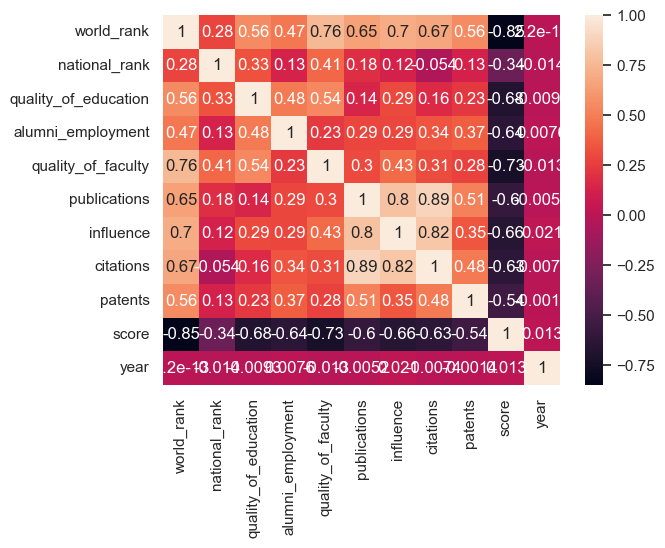

In [257]:
sns.heatmap(corr_matrix, annot=True)

Судя по корреляционной таблице, наибольшое влияние на рейтинг трудоустроства оказывают `world_rank`, `quality_of_education` 

Создадим новый столбец, где разделим рейтинг `alumni_employment` на высокий и низкий. То есть создадим якобы топ 50 университетов по рейтингу трудоустройства, такие бинарные данные помогут для построения графиков рассеяния

In [259]:
df1.loc[df1['alumni_employment']>50, 'High_rank'] = 0
df1.loc[df1['alumni_employment']<=50, 'High_rank'] = 1

In [260]:
df1.head()

world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  citations  patents   score  year  High_rank  
0             1          1          1        5  100.00  2012        1.0  
1            12          4          4        1   91.67  2012        1.0  
2             4          2          2       15   89.50  2012        1.0  
3            16         16         11       50   86.17  2012        1.0  
4            37         22         22       18   85.21  2012        1.0

Далее будем рассматривать только этот новый столбец, поэтому удалим `alumni_employment`

In [261]:
df1 = df1.drop('alumni_employment', axis=1)

In [262]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            200 non-null    int64  
 1   institution           200 non-null    object 
 2   country               200 non-null    object 
 3   national_rank         200 non-null    int64  
 4   quality_of_education  200 non-null    int64  
 5   quality_of_faculty    200 non-null    int64  
 6   publications          200 non-null    int64  
 7   influence             200 non-null    int64  
 8   citations             200 non-null    int64  
 9   patents               200 non-null    int64  
 10  score                 200 non-null    float64
 11  year                  200 non-null    int64  
 12  High_rank             200 non-null    float64
dtypes: float64(2), int64(9), object(2)
memory usage: 21.9+ KB


In [263]:
columns_to_show = ['world_rank','national_rank','quality_of_education', 'quality_of_faculty']
df1.groupby(['High_rank'])[columns_to_show].agg(["mean","std","min","max"])

world_rank                     national_rank                     \
                mean        std min  max          mean        std min max   
High_rank                                                                   
0.0        57.268456  24.824147  10  100     19.248322  18.563225   1  58   
1.0        30.725490  31.201973   1  100     13.882353  17.211214   1  57   

          quality_of_education                     quality_of_faculty  \
                          mean        std min  max               mean   
High_rank                                                               
0.0                  74.939597  30.953153   1  101          60.778523   
1.0                  40.235294  36.415155   1  101          43.980392   

                               
                 std min  max  
High_rank                      
0.0        30.397556   6  101  
1.0        42.195493   1  101

In [264]:
columns_to_show1 = ['publications','influence','citations', 'patents', 'score']
df1.groupby(['High_rank'])[columns_to_show1].agg(["mean","std","min","max"])

publications                      influence                      \
                  mean        std min  max       mean        std min  max   
High_rank                                                                   
0.0          59.899329  31.137174   2  101  60.872483  30.809855   3  101   
1.0          40.078431  35.852946   1  101  40.137255  37.885100   1  101   

           citations                        patents                      \
                mean        std min  max       mean        std min  max   
High_rank                                                                 
0.0        59.597315  30.461522   3  101  70.516779  33.532478   2  101   
1.0        38.333333  35.236156   1  101  43.392157  38.352094   1  101   

               score                            
                mean        std    min     max  
High_rank                                       
0.0        50.625235   6.417721  43.47   78.55  
1.0        68.197059  17.913872  43.36  100.00

In [265]:
features = ['quality_of_education', 'quality_of_faculty', 'publications', 'influence', 'citations', 'patents']

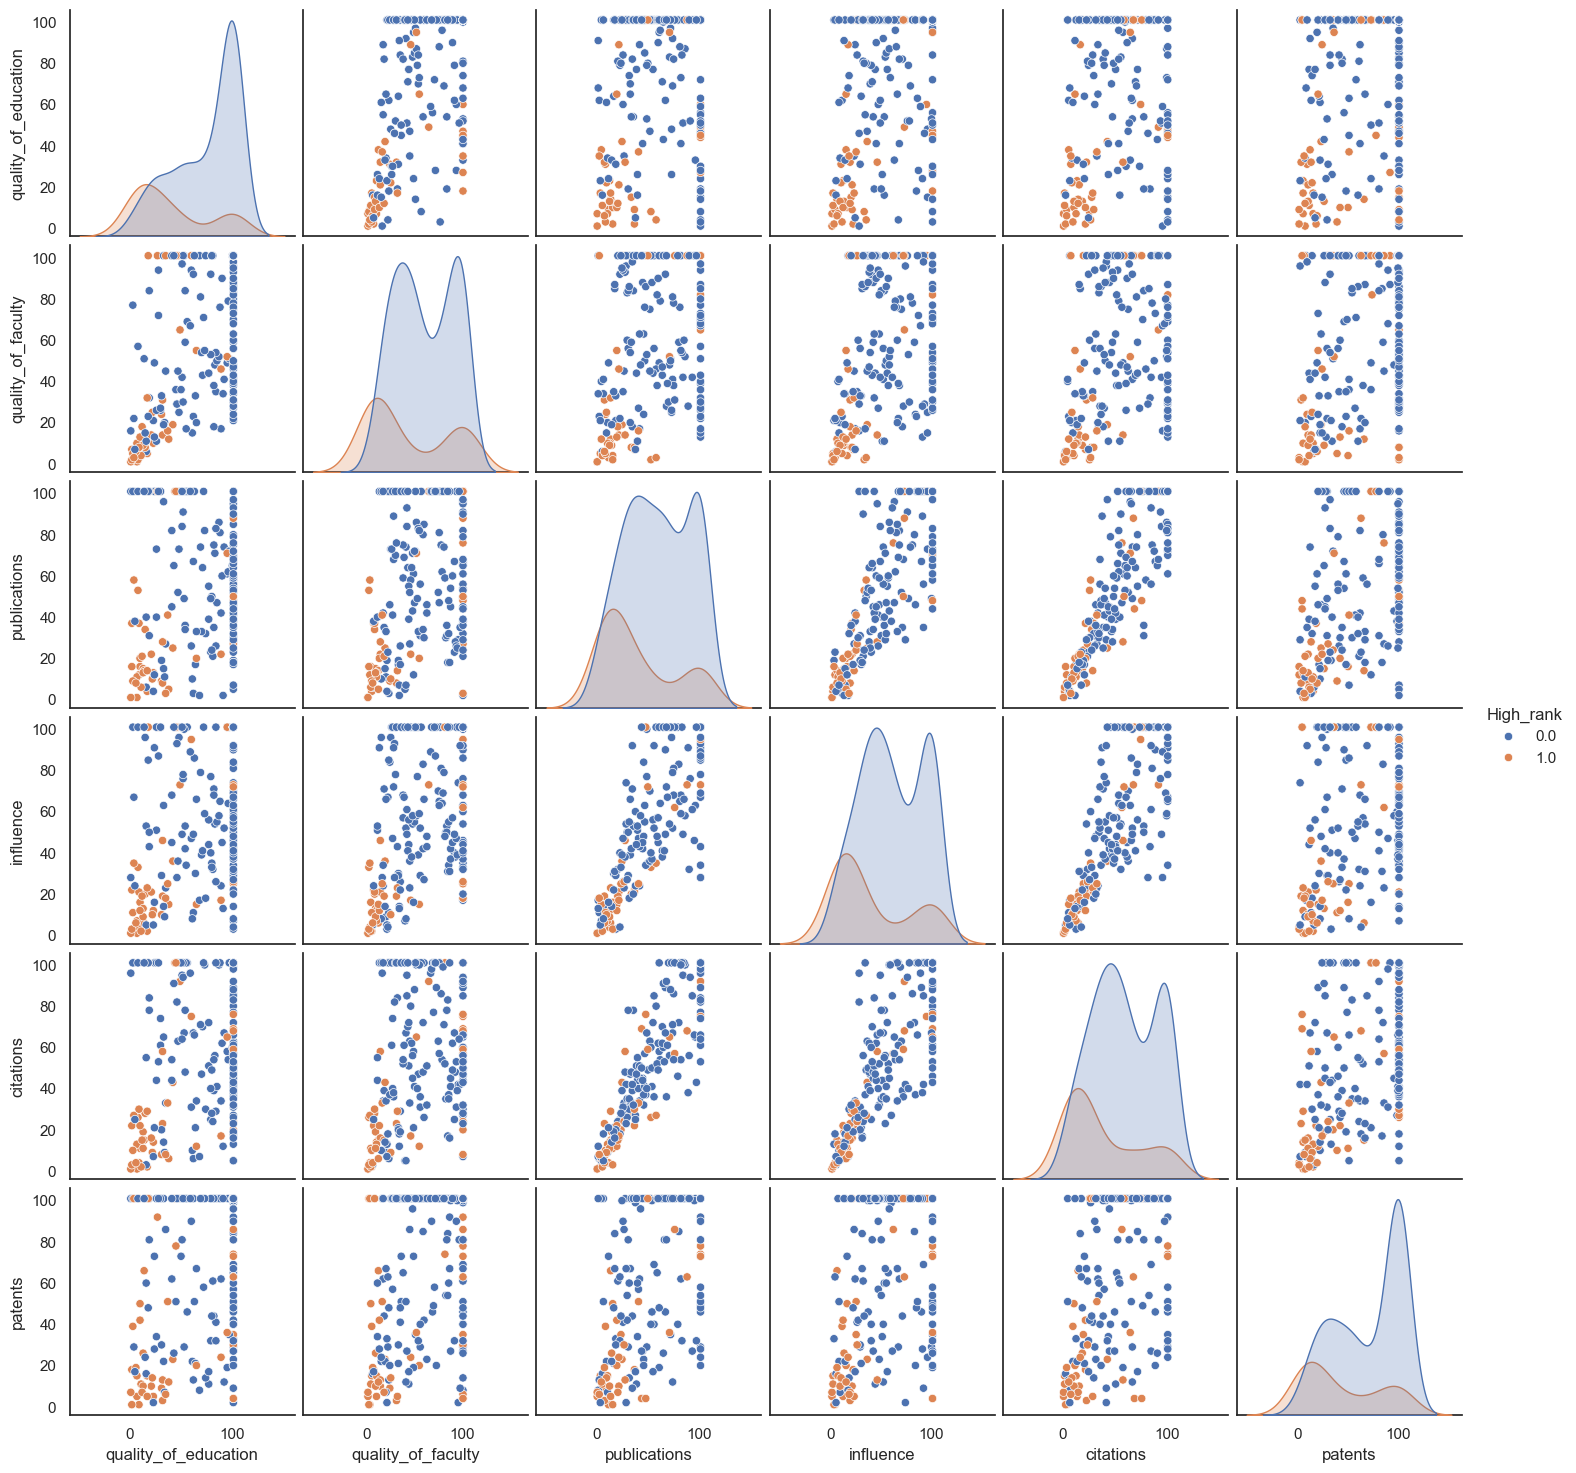

In [266]:
sns.pairplot(df1[features + ['High_rank',]], hue = 'High_rank')

Если посмотреть на графики, расположенные по диагонали, то можно увидеть, что низкий рейтинг(то есть ближе к 100) по каждому из столбцов означает низкий рейтинг трудоустройства

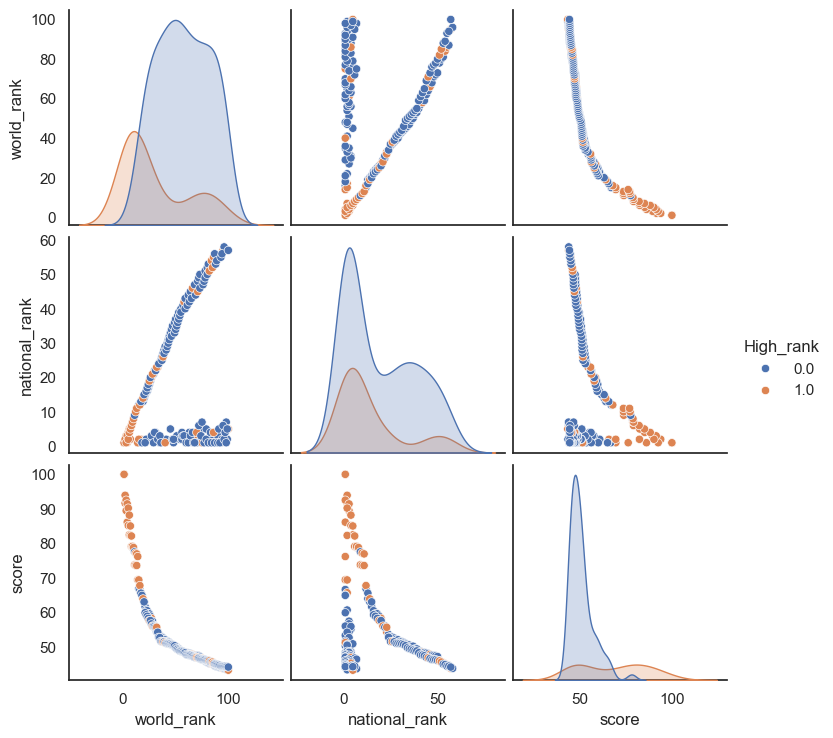

In [267]:
sns.pairplot(df1[['world_rank', 'national_rank', 'score'] + ['High_rank']], hue = 'High_rank')

Здесь видно, что у университетов с высокими мировым и национальным рейтингами больше рейтинг трудоустройства. Это говорит о том, что эти три показателя всё таки говорят так о высоком рейтинге трудоустройства.

In [272]:
df1.groupby(['country'])['High_rank'].agg([np.mean]).sort_values(by='mean', ascending=False)

C:\Users\extre\AppData\Local\Temp\ipykernel_19472\3913894136.py:1: FutureWarning:

The provided callable <function mean at 0x0000020F6B5D1EE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



mean
country                 
South Korea     1.000000
Japan           0.454545
USA             0.313043
France          0.300000
United Kingdom  0.266667
Switzerland     0.125000
Norway          0.000000
Sweden          0.000000
Singapore       0.000000
Russia          0.000000
Australia       0.000000
Canada          0.000000
Italy           0.000000
Israel          0.000000
Germany         0.000000
Finland         0.000000
Denmark         0.000000
Netherlands     0.000000

Данный показатель означает, что в среднем у университетов Кореии низкие показатели трудоустрройства, лучше всего обстоят дела у Швейцарии

### Из данного анализа следует, что для данных 2012-2013 гг. высокий национальный, мировой и др. рейтинги часто означают и высокий показатель трудоустройства

# Теперь рассмотрим данные 2014-2015 гг

In [283]:
df2 = data[data.year>2013].copy()

In [284]:
df2.head()

world_rank                            institution         country  \
200           1                     Harvard University             USA   
201           2                    Stanford University             USA   
202           3  Massachusetts Institute of Technology             USA   
203           4                University of Cambridge  United Kingdom   
204           5                   University of Oxford  United Kingdom   

     national_rank  quality_of_education  alumni_employment  \
200              1                     1                  1   
201              2                    11                  2   
202              3                     3                 11   
203              1                     2                 10   
204              2                     7                 12   

     quality_of_faculty  publications  influence  citations  broad_impact  \
200                   1             1          1          1           1.0   
201                   4             5          3          3           4.0   
202                   2            15          2          2           2.0   
203                   5            10          9         12          13.0   
204                  10            11         12         11          12.0   

     patents   score  year  
200        2  100.00  2014  
201        6   99.09  2014  
202        1   98.69  2014  
203       48   97.64  2014  
204       16   97.51  2014

In [286]:
df2.tail()

world_rank                      institution   country  national_rank  \
2195         996        University of the Algarve  Portugal              7   
2196         997            Alexandria University     Egypt              4   
2197         998     Federal University of CearÃ¡    Brazil             18   
2198         999          University of A CoruÃ±a     Spain             40   
2199        1000  China Pharmaceutical University     China             83   

      quality_of_education  alumni_employment  quality_of_faculty  \
2195                   367                567                 218   
2196                   236                566                 218   
2197                   367                549                 218   
2198                   367                567                 218   
2199                   367                567                 218   

      publications  influence  citations  broad_impact  patents  score  year  
2195           926        845        812         969.0      816  44.03  2015  
2196           997        908        645         981.0      871  44.03  2015  
2197           830        823        812         975.0      824  44.03  2015  
2198           886        974        812         975.0      651  44.02  2015  
2199           861        991        812         981.0      547  44.02  2015

In [287]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 200 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2000 non-null   int64  
 1   institution           2000 non-null   object 
 2   country               2000 non-null   object 
 3   national_rank         2000 non-null   int64  
 4   quality_of_education  2000 non-null   int64  
 5   alumni_employment     2000 non-null   int64  
 6   quality_of_faculty    2000 non-null   int64  
 7   publications          2000 non-null   int64  
 8   influence             2000 non-null   int64  
 9   citations             2000 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2000 non-null   int64  
 12  score                 2000 non-null   float64
 13  year                  2000 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 234.4+ KB


In [288]:
df2.shape

(2000, 14)

Посмотрим как изменился рейтинг трудоустройства топ 12 университетов в промежутке 2014 - 2015 гг.

In [289]:
import plotly.express as px
top_universities = df2.groupby('institution')['alumni_employment'].mean().sort_values().head(15).index

# Фильтрация данных для топ 15 университетов
subset_data = df2[df2['institution'].isin(top_universities)]

fig = px.line(subset_data, x='year', y='alumni_employment', color='institution',
              labels={'year': 'Год', 'alumni_employment': 'Рейтинг трудоустройства'},
              title='Изменение трудоустройства выпускников по годам для топ 15 университетов',
              hover_name='institution')

# Инвертируем ось Y, так как чем ближе ранг к 1, тем лучше
fig.update_yaxes(autorange="reversed")


fig.show()

Здесь видно, что университеты, которые поднялись в рейтинге в 2012-13 гг, сохранили свои позиции в 2014-15гг

In [290]:
fig = px.line(subset_data, x='year', y='world_rank', color='institution',
              labels={'year': 'Год', 'world_rank': 'Мировой рейтинг'},
              title='Изменение мирового рейтинга по годам для топ 15 университетов',
              hover_name='institution')

fig.update_yaxes(autorange="reversed")


fig.show()

И здесь эти университеты сохранили свои позиции

In [291]:
fig = px.line(subset_data, x='year', y='national_rank', color='institution',
              labels={'year': 'Год', 'national_rank': 'Национальный рейтинг'},
              title='Изменение национального рейтинга по годам для топ 15 университетов',
              hover_name='institution')

fig.update_yaxes(autorange="reversed")


fig.show()

Однако здесь видно как А%0cole Polytechnique поднялся в национальном рейтинге, но в рейтинге трудоустройства он спустился. Это говорит о том, что высокий показатель национального рейтинга, не является показателем высокого рейтинга трудоустройства

In [292]:
fig = px.line(subset_data, x='year', y='score', color='institution',
              labels={'year': 'Год', 'score': 'Итоговый балл'},
              title='Изменение итогового балла по годам для топ 15 университетов',
              hover_name='institution')

fig.show()

А здесь видно, как университеты Токио и Пенсильвания в 2015 году получили немного низкий итоговый балл, однако если посмотреть на график рейтинга трудоустройства, то можно увидеть, что эти университеты сохраняют свой рейтинг в этом же году.

# Рассмотрим другие методы анализа для данных 2014-15 гг

In [296]:
corr_matrix = df2.drop(['institution', 'country'], axis = 1).corr()

In [297]:
corr_matrix

world_rank  national_rank  quality_of_education  \
world_rank            1.000000e+00       0.201458              0.587646   
national_rank         2.014578e-01       1.000000              0.163569   
quality_of_education  5.876457e-01       0.163569              1.000000   
alumni_employment     5.860034e-01       0.080229              0.471441   
quality_of_faculty    5.715811e-01       0.173040              0.691573   
publications          9.065349e-01       0.300843              0.522428   
influence             8.733629e-01       0.115333              0.549674   
citations             8.247535e-01       0.144255              0.526463   
broad_impact          9.429980e-01       0.173043              0.521615   
patents               6.314571e-01       0.112910              0.391934   
score                -5.600022e-01      -0.176410             -0.604385   
year                 -1.366711e-13      -0.000112              0.035917   

                      alumni_employment  quality_of_faculty  publications  \
world_rank                     0.586003            0.571581      0.906535   
national_rank                  0.080229            0.173040      0.300843   
quality_of_education           0.471441            0.691573      0.522428   
alumni_employment              1.000000            0.392224      0.466084   
quality_of_faculty             0.392224            1.000000      0.534627   
publications                   0.466084            0.534627      1.000000   
influence                      0.409959            0.564924      0.847979   
citations                      0.446784            0.554913      0.792149   
broad_impact                   0.423619            0.549345      0.917878   
patents                        0.408691            0.419068      0.599615   
score                         -0.493508           -0.718075     -0.526862   
year                           0.123798            0.059659      0.000014   

                      influence  citations  broad_impact   patents     score  \
world_rank             0.873363   0.824753      0.942998  0.631457 -0.560002   
national_rank          0.115333   0.144255      0.173043  0.112910 -0.176410   
quality_of_education   0.549674   0.526463      0.521615  0.391934 -0.604385   
alumni_employment      0.409959   0.446784      0.423619  0.408691 -0.493508   
quality_of_faculty     0.564924   0.554913      0.549345  0.419068 -0.718075   
publications           0.847979   0.792149      0.917878  0.599615 -0.526862   
influence              1.000000   0.810993      0.916040  0.526975 -0.526225   
citations              0.810993   1.000000      0.852638  0.508626 -0.523585   
broad_impact           0.916040   0.852638      1.000000  0.562861 -0.531590   
patents                0.526975   0.508626      0.562861  1.000000 -0.460210   
score                 -0.526225  -0.523585     -0.531590 -0.460210  1.000000   
year                   0.000194   0.007967     -0.000124  0.082266 -0.030928   

                              year  
world_rank           -1.366711e-13  
national_rank        -1.122947e-04  
quality_of_education  3.591750e-02  
alumni_employment     1.237984e-01  
quality_of_faculty    5.965893e-02  
publications          1.385989e-05  
influence             1.942873e-04  
citations             7.967492e-03  
broad_impact         -1.237589e-04  
patents               8.226599e-02  
score                -3.092818e-02  
year                  1.000000e+00

<Axes: >

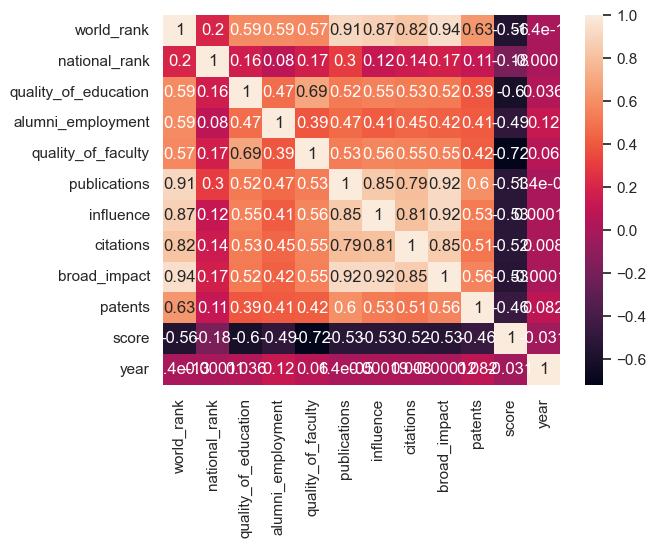

In [298]:
sns.heatmap(corr_matrix, annot=True)

Коэффицент корреляции поднялся для всех столбцов. Это либо связано с количеством данных, либо же влияние других рейтингов реально возрасло по отношению к alumni_employment 

Создадим новый столбец, где разделим рейтинг `alumni_employment` на высокий и низкий. То есть создадим якобы топ 200 университетов по рейтингу трудоустройства, такие бинарные данные помогут для построения графиков рассеяния

In [300]:
df2.loc[df2['alumni_employment']>200, 'High_rank'] = 0
df2.loc[df2['alumni_employment']<=200, 'High_rank'] = 1

In [301]:
df2.head()

world_rank                            institution         country  \
200           1                     Harvard University             USA   
201           2                    Stanford University             USA   
202           3  Massachusetts Institute of Technology             USA   
203           4                University of Cambridge  United Kingdom   
204           5                   University of Oxford  United Kingdom   

     national_rank  quality_of_education  alumni_employment  \
200              1                     1                  1   
201              2                    11                  2   
202              3                     3                 11   
203              1                     2                 10   
204              2                     7                 12   

     quality_of_faculty  publications  influence  citations  broad_impact  \
200                   1             1          1          1           1.0   
201                   4             5          3          3           4.0   
202                   2            15          2          2           2.0   
203                   5            10          9         12          13.0   
204                  10            11         12         11          12.0   

     patents   score  year  High_rank  
200        2  100.00  2014        1.0  
201        6   99.09  2014        1.0  
202        1   98.69  2014        1.0  
203       48   97.64  2014        1.0  
204       16   97.51  2014        1.0

Далле будем рассматривать только этот новый столбец, поэтому удалим `alumni_employment`

In [302]:
df2 = df2.drop('alumni_employment', axis=1)

In [303]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 200 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2000 non-null   int64  
 1   institution           2000 non-null   object 
 2   country               2000 non-null   object 
 3   national_rank         2000 non-null   int64  
 4   quality_of_education  2000 non-null   int64  
 5   quality_of_faculty    2000 non-null   int64  
 6   publications          2000 non-null   int64  
 7   influence             2000 non-null   int64  
 8   citations             2000 non-null   int64  
 9   broad_impact          2000 non-null   float64
 10  patents               2000 non-null   int64  
 11  score                 2000 non-null   float64
 12  year                  2000 non-null   int64  
 13  High_rank             2000 non-null   float64
dtypes: float64(3), int64(9), object(2)
memory usage: 234.4+ KB


In [306]:
columns_to_show = ['world_rank','national_rank','broad_impact', 'quality_of_education', 'quality_of_faculty']
df2.groupby(['High_rank'])[columns_to_show].agg(["mean","std","min","max"])

world_rank                       national_rank                      \
                 mean         std min   max          mean        std min  max   
High_rank                                                                       
0.0        577.116875  261.747893  12  1000      45.41375  55.651523   1  229   
1.0        194.032500  159.531838   1   653      30.93500  41.596411   1  184   

          broad_impact                          quality_of_education  \
                  mean         std  min     max                 mean   
High_rank                                                              
0.0          552.88625  267.702975  9.0  1000.0            318.44875   
1.0          271.95250  248.886312  1.0   958.0            206.21250   

                               quality_of_faculty                      
                  std min  max               mean        std min  max  
High_rank                                                              
0.0         86.747828   6  367         200.376875  39.449905   7  218  
1.0        130.226859   1  367         154.130000  76.193778   1  218

In [307]:
columns_to_show1 = ['publications','influence','citations', 'patents', 'score']
df2.groupby(['High_rank'])[columns_to_show1].agg(["mean","std","min","max"])

publications                         influence                       \
                  mean         std min   max        mean         std min  max   
High_rank                                                                       
0.0            560.870  265.558247  12  1000  555.410625  269.014807   5  991   
1.0            258.595  248.207339   1   995  279.452500  255.611621   1  943   

           citations                        patents                       \
                mean         std min  max      mean         std min  max   
High_rank                                                                  
0.0        500.40125  228.725072  15  812  516.6525  240.307764   5  871   
1.0        245.10250  227.054666   1  812  284.9950  251.470213   1  871   

               score                           
                mean        std    min    max  
High_rank                                      
0.0        45.542819   2.707816  44.02   85.5  
1.0        53.166875  11.899772  44.43  100.0

In [308]:
features = ['quality_of_education', 'quality_of_faculty', 'publications', 'influence', 'citations', 'patents']

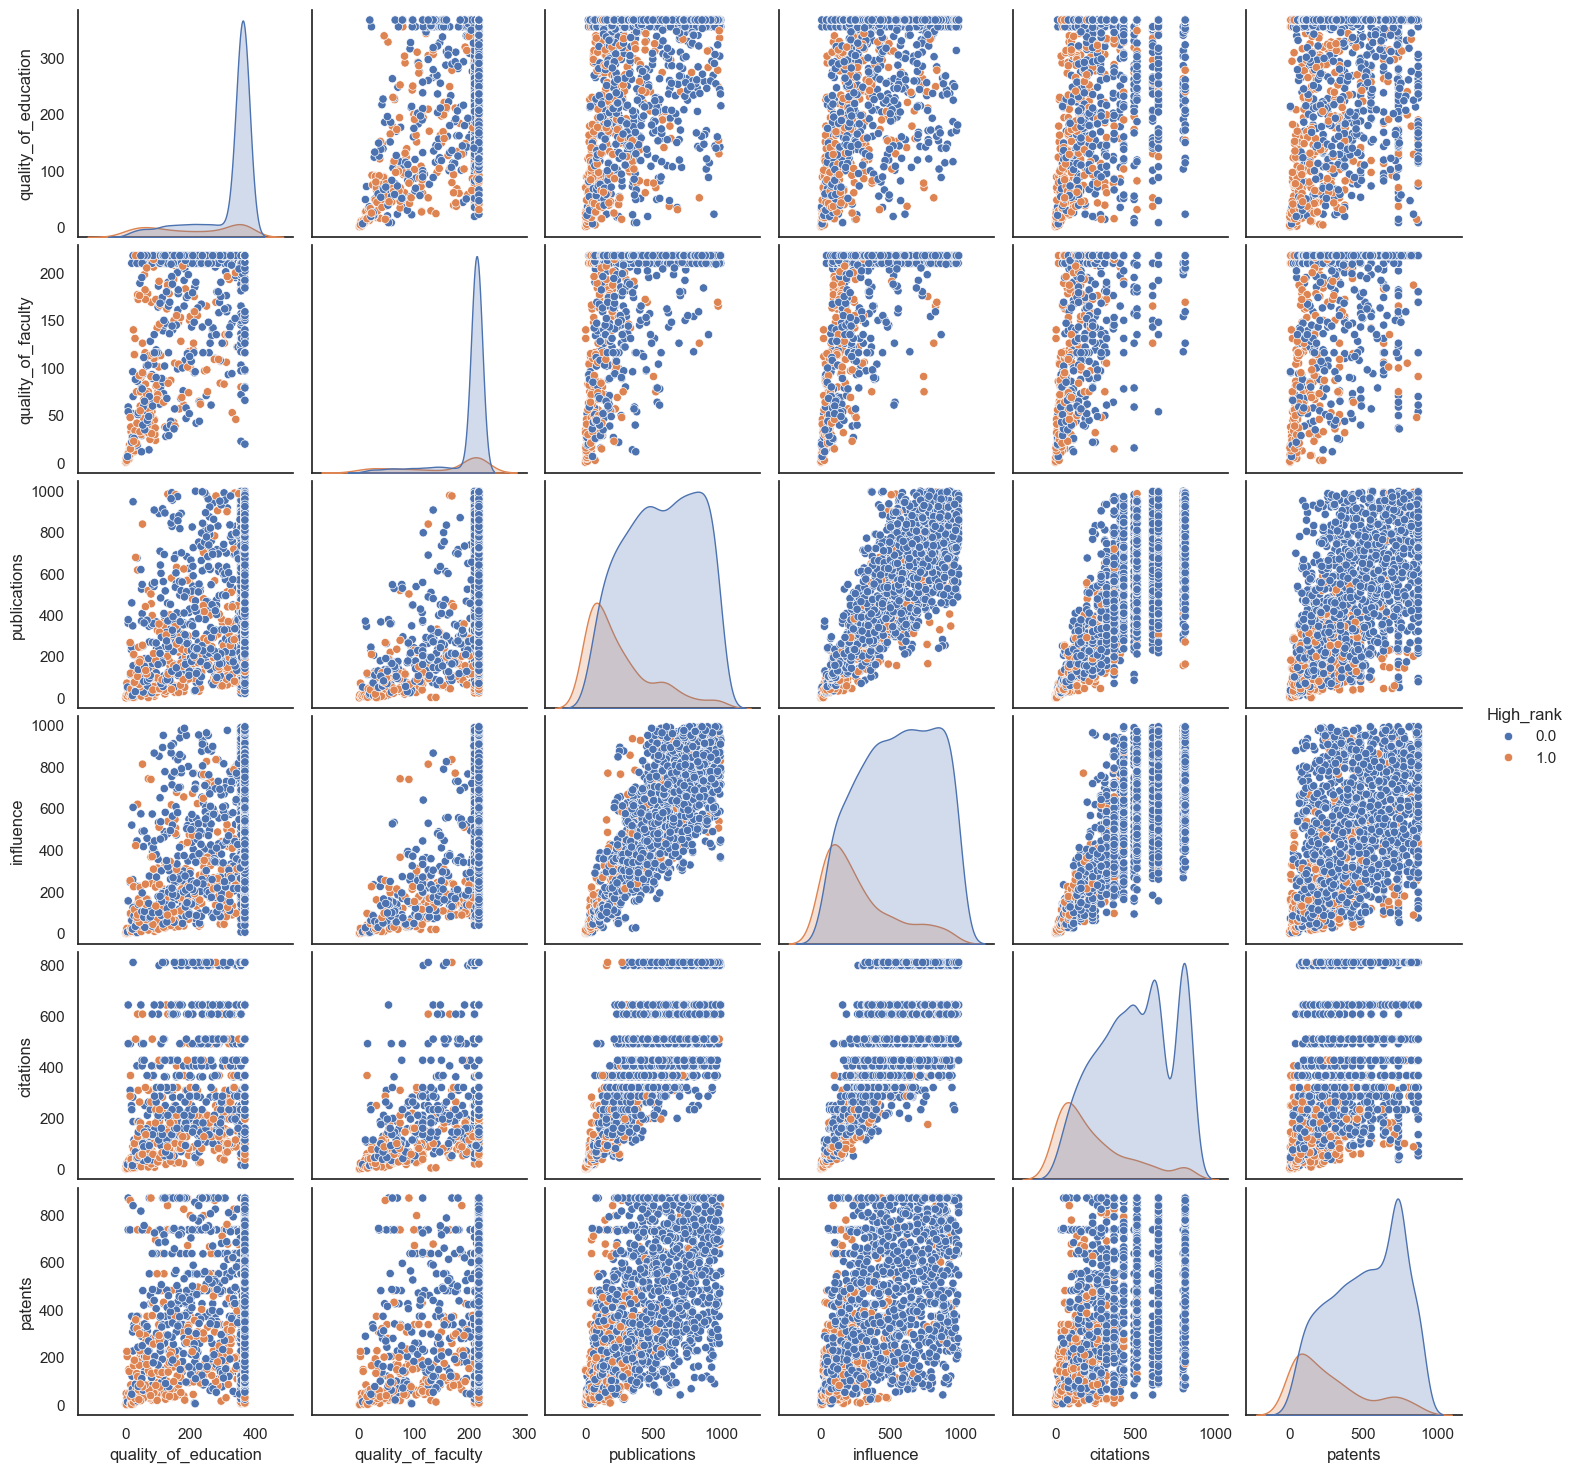

In [309]:
sns.pairplot(df2[features + ['High_rank',]], hue = 'High_rank')

Здесь можно увидеть сильный разброс значений для столбцов quality_of_eduaction и quality_of_faculty, однако всё же больше всего оранжевых точек в области значений (0, 200) для quality_of_eduaction и (0, 100) для quality_of_faculty

Тут значения по диагонали имеют такое же значение, что и для первой части датасета

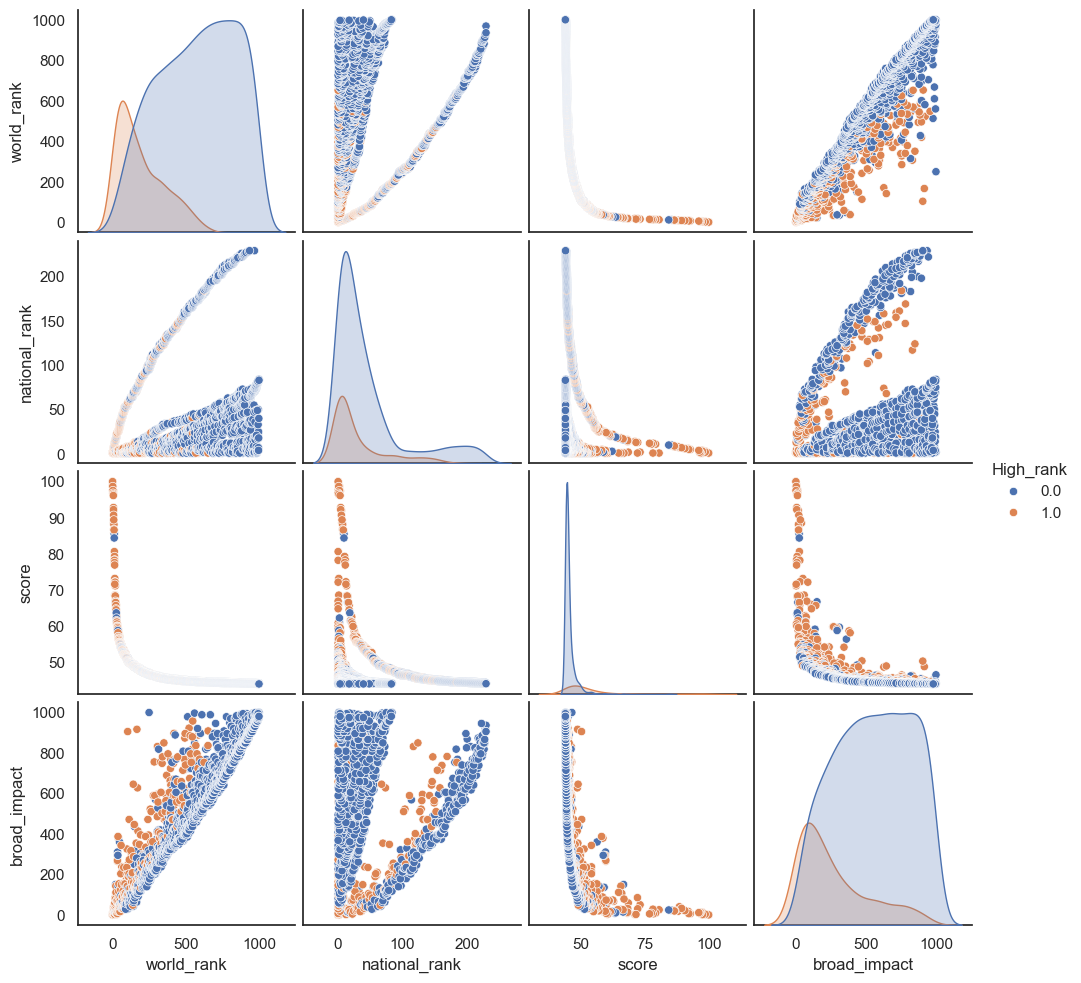

In [310]:
sns.pairplot(df2[['world_rank', 'national_rank', 'score', 'broad_impact'] + ['High_rank']], hue = 'High_rank')

Для данных 2014-15 гг не всё так однозначно: если посмотреть график рассеяния между `world_rank` и `broad_impact`, то можно увидеть, что высокий рейтинг трудоустройства характерен для всех значений broad_impact, хоть их количество и мало. Это значит, что всё же broad_impact не является показателем высокого рейтинга трудоустройства. Остальные три фактора сильно влияют на рейтинг трудоустройства.

In [311]:
df2.groupby(['country'])['High_rank'].agg([np.mean]).sort_values(by='mean', ascending=False)

C:\Users\extre\AppData\Local\Temp\ipykernel_19472\294742694.py:1: FutureWarning:

The provided callable <function mean at 0x0000020F6B5D1EE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



mean
country                       
South Africa          0.800000
Singapore             0.500000
Colombia              0.500000
Denmark               0.400000
Canada                0.369231
USA                   0.364629
Thailand              0.333333
Malaysia              0.333333
Switzerland           0.333333
Hong Kong             0.333333
Israel                0.285714
United Kingdom        0.263566
Ireland               0.250000
New Zealand           0.250000
Saudi Arabia          0.250000
Chile                 0.250000
Russia                0.250000
Netherlands           0.230769
Sweden                0.227273
Norway                0.200000
India                 0.193548
South Korea           0.157143
China                 0.149701
Australia             0.148148
Germany               0.136364
Japan                 0.128378
Finland               0.111111
Brazil                0.111111
Turkey                0.100000
Belgium               0.100000
Taiwan                0.086957
Austria               0.083333
Greece                0.071429
Spain                 0.061728
France                0.060606
Poland                0.055556
Italy                 0.021277
Uganda                0.000000
United Arab Emirates  0.000000
Slovenia              0.000000
Slovak Republic       0.000000
Argentina             0.000000
Lebanon               0.000000
Serbia                0.000000
Romania               0.000000
Puerto Rico           0.000000
Portugal              0.000000
Mexico                0.000000
Lithuania             0.000000
Iran                  0.000000
Iceland               0.000000
Hungary               0.000000
Estonia               0.000000
Egypt                 0.000000
Czech Republic        0.000000
Cyprus                0.000000
Croatia               0.000000
Bulgaria              0.000000
Uruguay               0.000000

Здесь уже по среднему рейтингу выпускников на первом месте Южная Африка(то есть на последнем)

### Из данного анализа следует, что такие показатели как мировой рейтинг, национальный рейтинг и итоговый балл сильно влияют на рейтинг трудоустройства, с другими переменными не все так однозначно